# Chap.05 分類 1：アヤメの判別

In [1]:
# ライブラリの準備
import pandas as pd

## 5.2 データの前処理

In [3]:
# 5-1 データフレームの作成
df = pd.read_csv('../support/datafiles/iris.csv')
print(df.head())
print(df.tail())

   がく片長さ  がく片幅  花弁長さ   花弁幅           種類
0   0.22  0.63  0.08  0.04  Iris-setosa
1   0.17  0.42  0.35  0.04  Iris-setosa
2   0.11  0.50  0.13  0.04  Iris-setosa
3   0.08  0.46  0.26  0.04  Iris-setosa
4   0.19  0.67  0.44  0.04  Iris-setosa
     がく片長さ  がく片幅  花弁長さ   花弁幅              種類
145   0.67  0.42  0.54  0.92  Iris-virginica
146   0.56  0.21  0.69  0.46  Iris-virginica
147   0.61  0.42   NaN  0.79  Iris-virginica
148   0.53  0.58  0.63  0.92  Iris-virginica
149   0.44  0.42  0.41  0.71  Iris-virginica


In [4]:
# 5-2 unique()メソッドで種類列の値を確認する
df['種類'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# 5-3 array型の特定要素を参照
shurui = df['種類'].unique()
shurui

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# 5-4 value_counts()メソッドでデータの出現回数をカウントする
df['種類'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 種類, dtype: int64

In [7]:
# 5-6 isnull()メソッドで欠損値の有無を調べる
df.isnull()

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [8]:
# any()メソッドにより列単位の欠損値を確認する
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [9]:
# 5-8 sum()メソッドで各列の合計を求める
df.sum()

がく片長さ                                                62.29
がく片幅                                                 65.62
花弁長さ                                                 72.04
花弁幅                                                  66.22
種類       Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

In [10]:
# 5-9 isnull()メソッドとsum()メソッドで各列の欠損値の数を求める
tmp = df.isnull()
tmp.sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

In [11]:
# 5-10 dropna()メソッドで欠損値を含む行・列を削除する
df2 = df.dropna(how='any', axis=0)
df2.tail()

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
144,0.67,0.54,0.70,0.72,Iris-virginica
145,0.67,0.42,0.54,0.92,Iris-virginica
146,0.56,0.21,0.69,0.46,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [15]:
# 5-11 削除元のデータフレームを確認する
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ     False
花弁幅       True
種類       False
dtype: bool

In [13]:
# 5-12 fillna()メソッドで欠損値を指定した値に置き換える
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail()

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
145,0.67,0.42,0.54,0.92,Iris-virginica
146,0.56,0.21,0.69,0.46,Iris-virginica
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [14]:
# 5-13 mean()メソッドで数値の列の平均値を計算する
df.mean()

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_8775/1438665284.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.480267
花弁幅      0.447432
dtype: float64

In [17]:
# 5-14 特定の列だけを計算する
df['がく片長さ'].mean()

0.42087837837837844

In [18]:
# 5-15 標準偏差の計算
df.std()

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_8775/2820578723.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


がく片長さ    0.228910
がく片幅     0.181137
花弁長さ     0.236909
花弁幅      0.309960
dtype: float64

In [19]:
# 5-16 平均値を求めてデータフレームの欠損値と置き換える
df = pd.read_csv('../support/datafiles/iris.csv')

# 各列の平均値を計算して、colmeanに代入する
colmean = df.mean()

# 平均値で欠損値を穴埋めしてdf2に代入する
df2 = df.fillna(colmean)

# 欠損値があるか確認する
df2.isnull().any(axis=0)

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_8775/1527167174.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  colmean = df.mean()


がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

In [20]:
# 5-17 特徴量と正解データを変数に代入する
xcol = ['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']
x = df2[xcol]
t = df2['種類']

## 5.3 モデルの作成と学習

In [21]:
# 5-18 決定木モデルを作成する
from sklearn import tree

# モデルの作成
model = tree.DecisionTreeClassifier(max_depth=2, random_state=0)

In [22]:
# 5-19 モデルの学習と正解率の計算
model.fit(x, t)
model.score(x, t)

0.94

## 5.4 モデルの評価

In [25]:
# 5-20 訓練データとテストデータに分割する
from sklearn.model_selection import train_test_split

# x_train, y_train: 学習に利用する訓練データ
# x_test, y_test: 検証に利用するテストデータ
x_train, x_test, y_train, y_test = train_test_split(
    x, t, test_size=0.3, random_state=0
)

In [24]:
# 5-21 train_test_split()関数の結果を確認する
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [26]:
# 5-22 訓練データでの学習と正解率の計算
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9555555555555556

In [27]:
# 5-23 モデルを保存する
import pickle

with open('../models/iris_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## 5.5 決定木の図の作成

In [28]:
# 5-24 分岐条件の列を決める
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [29]:
# 5-25 分岐条件のしきい値を含む配列を返す
# tree_.threshold
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

In [30]:
# 5-26 リーフに到達したデータの数を返す
# tree_.value

# ノード番号[1, 3, 4]に到達したアヤメの種類ごとの数
print(model.tree_.value[1])
print(model.tree_.value[3])
print(model.tree_.value[4])

[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


In [31]:
# 5-27 アヤメの種類とグループ番号の対応を調べる
# classes_
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(0.4, 0.8333333333333334, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

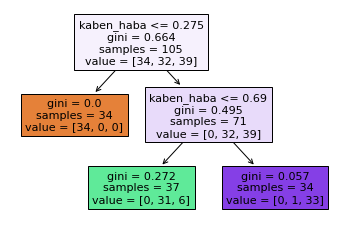

In [32]:
# 5-28 plot_tree()関数で決定木を描画する
x_train.columns = ['gaku_nagasa', 'gaku_haba', 'kaben_nagasa', 'kaben_haba']

from sklearn.tree import plot_tree

plot_tree(model, feature_names = x_train.columns, filled=True)

## 5.7 練習問題

In [ ]:
# Exercises 5-1 
import pandas as pd

In [38]:
# Exercises 5-2
df = pd.read_csv('../support/datafiles/ex2.csv')
print(df.head())
print(df.tail())

         x0        x1        x2        x3  target
0 -1.244674  1.452124 -1.184385 -0.839169       1
1 -1.662920 -0.375804 -0.956673  0.380114       0
2 -1.926513       NaN -1.203904 -0.728801       1
3 -1.455014 -0.472972  0.500495 -0.809670       0
4 -1.255422  1.348182  0.827424 -0.334090       1
          x0        x1        x2        x3  target
95 -0.988204  0.934396  0.131865 -0.158939       1
96 -2.057470  2.869821 -0.887651 -0.741163       1
97 -1.669722  2.168812 -0.018603  0.607099       1
98 -1.011851  0.973641 -0.474993 -0.509644       1
99 -1.578463  2.076695  0.200962  2.533324       1


In [34]:
# Exercises 5-3 
df.shape

(100, 5)

In [35]:
# Exercises 5-4 
df['target'].value_counts()

1    80
0    20
Name: target, dtype: int64

In [36]:
# Exercises 5-5
df.isnull().sum()

x0        0
x1        1
x2        1
x3        0
target    0
dtype: int64

In [37]:
# Exercises 5-6
df2 = df.fillna(df.median())
print(df2.head())
print(df2.tail())

         x0        x1        x2        x3  target
0 -1.244674  1.452124 -1.184385 -0.839169       1
1 -1.662920 -0.375804 -0.956673  0.380114       0
2 -1.926513  0.792104 -1.203904 -0.728801       1
3 -1.455014 -0.472972  0.500495 -0.809670       0
4 -1.255422  1.348182  0.827424 -0.334090       1
          x0        x1        x2        x3  target
95 -0.988204  0.934396  0.131865 -0.158939       1
96 -2.057470  2.869821 -0.887651 -0.741163       1
97 -1.669722  2.168812 -0.018603  0.607099       1
98 -1.011851  0.973641 -0.474993 -0.509644       1
99 -1.578463  2.076695  0.200962  2.533324       1


In [39]:
# Exercises 5-7
xcol = ['x0', 'x1', 'x2', 'x3']
x = df2[xcol]
t = df2['target']

In [40]:
# Exercises 5-9
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, t, test_size=0.2, random_state=0
)

In [41]:
# Exercises 5-11
from sklearn import tree

model = tree.DecisionTreeClassifier(
    max_depth=3, random_state=0
)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [42]:
# Exercises 5-13
model.score(x_test, y_test)

0.95

In [44]:
# Exercises 5-14
new_data = [[1.56, 0.23, -1.1, -2.8]]
answer = model.predict(new_data)
answer

/Users/takeru/Library/CloudStorage/OneDrive-個人用/Learn/Python/Introduction_to_Machine_Learning_with_Python_Imp/ml_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.6, 0.875, 'x1 <= -0.353\ngini = 0.305\nsamples = 80\nvalue = [15, 65]'),
 Text(0.4, 0.625, 'x0 <= -0.111\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6, 0.375, 'x0 <= 0.158\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]')]

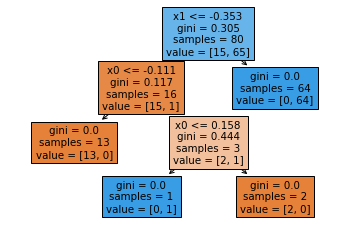

In [45]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=x_train.columns, filled=True)

In [47]:
print(model.tree_.feature)
print(model.tree_.threshold)
print(model.tree_.value[1])
print(model.tree_.value[2])
print(model.tree_.value[3])
print(model.tree_.value[4])
print(model.tree_.value[5])
print(model.tree_.value[6])
model.classes_

[ 1  0 -2  0 -2 -2 -2]
[-0.3529613  -0.11147957 -2.          0.15818604 -2.         -2.
 -2.        ]
[[15.  1.]]
[[13.  0.]]
[[2. 1.]]
[[0. 1.]]
[[2. 0.]]
[[ 0. 64.]]


array([0, 1])